# Challenge 1

## SciPy Tutorial
Pertinent information about [SciPy](https://docs.scipy.org/) and NumPy is available in the [SciPy Tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html).
 * Read [Introduction](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html)
 * Read [Basic functions](https://docs.scipy.org/doc/scipy/reference/tutorial/basic.html)
 * Read [Optimization](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)
 
Consider the function defined below.
 * Plot the function using [matplotlib](https://matplotlib.org/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

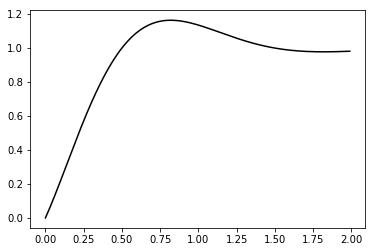

In [2]:
def g(t):
    return 1 - (np.exp(-2*t) * np.cos(np.pi*t))

t1 = np.arange(0.0, 2.0, 0.01)

plt.figure(1)
plt.plot(t1, g(t1), 'k')
plt.show()

Consider the class of functions of the form $f(t) = 1 - e^{-at}$ where $a$ is a free parameter.
 * Find the value of $a$ that minimizes the $L_2$ norm between $g(t)$ and $f(t)$ over the interval $[0, 2]$
 * Computer the residual mean squared error
 * Explain how you obtained $a$

## Solution

* When $a$ take $4.603$, the $L_2$ norm between $g(t)$ and $f(t)$ over the interval $[0,2]$ get the minimum $1.5045$.
* The residual mean squared error is $0.01132$.
* Firstly, I estimate the value of $a$. Then I write the expression of $L_2$ norm, construct a function on $a$. Then in a given range 0 to 15 within 0.001 steps, calculate the value of each $L_2$ norm, find the minimum, the corresponding $a$ is the result.
* I think my results are correct, I have tried to generate the plot of $a$ and $L_2$ norm, but failed. My code and the cause of the error is shown below, I don't know how to solve it.

The value of a:  4.603
The minimum of L2 norm:  1.50453872768
The residual mean squared error:  0.0113181839155


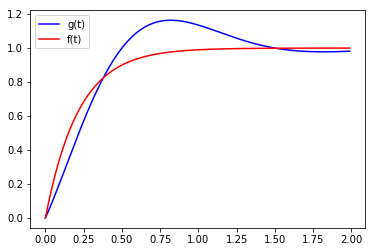

ValueError: operands could not be broadcast together with shapes (15000,) (200,) 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

t1 = np.arange(0, 2, 0.01)
a1 = np.arange(0, 15, 0.001)
a0 = 0
L2min = 1000
RMSE = 0


def g(t):
    return 1 - (np.exp(-2*t) * np.cos(np.pi*t))


def f(t, a):
    return 1 - (np.exp(-a*t))


def L2norm(a):
    l2norm = np.sqrt(np.sum(np.square(f(t1, a) - g(t1))))
    return l2norm


for a in a1:
    if L2min > L2norm(a):
        L2min = L2norm(a)
        a0 = a
        RMSE = np.square(L2min) / len(t1)

print("The value of a: ", a0)
print("The minimum of L2 norm: ", L2min)
print("The residual mean squared error: ", RMSE)

plt.figure(2)
plt.plot(t1, g(t1), 'b', label='g(t)')
plt.plot(t1, f(t1, a0), 'r',label='f(t)' )
plt.legend()
plt.show()

plt.figure(3)
plt.plot(a1, L2norm(a1), 'k')
plt.show()